# Homework 04:

* create notebook called: homework_04.ipynb (no spaces please)

* inside write a function: `deriv(func,a,method,h)`
`func` is a function that I can define
`a` is a point (float) at which I wante to evaluate the derivative
`method` is a string, and can have three options `forward`,`central`,`backward`
`h` is a step

* ***remember the function must not print anything, just return a single value***!!!
* to choose between schemes ('central','forward'..) use `if`, `elif`
* to test your function try:

```
def function(x):
    return x**3.0
    
print(deriv(function,2.0,method='forward',h=0.1) )
```
* compare your result using from `scipy.misc.derivative`

In [ ]:
def deriv(func, a, method, h):

  f=func

  if method=="forward":
    d = ( f(a+h)-f(a) ) / h
  elif method=="backward":
    d = ( f(a)-f(a-h) ) / h
  else:
    d = ( f(a+h)-f(a-h) ) / (2*h)
  
  return d

Ahora evaluamos la función por los tres métodos en un punto arbitrario, sea por ejemplo $a=2$, allí, se sabe que teóricamente, para $f(x)=x^{3}$ el valor de la derivada es $f'(2)=12$. 
El programa arroja la siguiente solución...

In [ ]:
def function(x):
    return x**3.0

print(deriv(function,2.0,method='forward',h=0.1) )

12.61000000000001


Observamos los valores obtenidos considerando los otros dos métodos admisibles. 

In [ ]:
print("Usando la derivada a izquierda se obtiene: ")
print(deriv(function,2.0,method='backward',h=0.1) )
print("Usando la derivada central se obtiene:")
print(deriv(function,2.0,method='central',h=0.1) )

Usando la derivada a izquierda se obtiene: 
11.410000000000009
Usando la derivada central se obtiene:
12.010000000000009


De lo anterior es claro que la diferencia central proporciona la mejor aproximación al valor de la derivada de la función en este punto. Comparamos ahora con el resultado obtenido usando las funciones optimizadas de Scipy

In [ ]:
from scipy.misc import derivative

print("El valor de la derivada de la función dada en el punto elegido es:")
print(derivative(function, x0=2.0, dx=0.1, n=1))



El valor de la derivada de la función dada en el punto elegido es:
12.010000000000009


Es curioso que se obtenga la misma precisión que puede obtenerse con un método de la librería Scipy solamente con un algoritmo tan sencillo como el implementado manualmente, aún cuando use el mismo método y los mismos parámetros de entrada. Sin embargo, hay una mejor manera de comparar mi código y el de la libería Scipy que no tiene que ver con la presición, si no con el tiempo de ejecución invertido por los algoritmos en obtener la misma respuesta. 

In [ ]:
import time as time

#Para la función implementada manualmente

t0_m = time.time_ns()
d_m = deriv(function,2.0,method='central',h=0.1)
tf_m =time.time_ns()

print(f"El algoritmo manual ha tardado { tf_m - t0_m } ns en obtener la respuesta. ")
print(f"El valor de la derivada de la función dada en el punto elegido es: {d_m}")

#Para la función implementada en Scipy

t0_s = time.time_ns()
d_s = derivative(function, x0=2.0, dx=0.1, n=1)
tf_s =time.time_ns()

print(f"El algoritmo de Scipy ha tardado { tf_s - t0_s } ns en obtener la respuesta. ")
print(f"El valor de la derivada de la función dada en el punto elegido es: {d_s}")

El algoritmo manual ha tardado 128846 ns en obtener la respuesta. 
El valor de la derivada de la función dada en el punto elegido es: 12.010000000000009
El algoritmo de Scipy ha tardado 304512 ns en obtener la respuesta. 
El valor de la derivada de la función dada en el punto elegido es: 12.010000000000009


Despues de correr unas 10 veces esta celda de código, formalmente estoy impresionado por el hecho de que por primera vez, mi código manual tenga un tiempo de ejecución menor que un algoritmo implementado en una librería optimizada como Scipy. 
Sin embargo, esto puede deberse, entre otras cosas, a que la función de Scipy recibe muchos más parámetros y tiene muchas funcionalidades adicionales a las que tiene mi algoritmo manual. Si se incrementa la precisión requerida, ¿Que pasa?, sea h=1e-6

In [ ]:
import time as time

h=1e-6

#Para la función implementada manualmente

t0_m = time.time_ns()
d_m = deriv(function,2.0,method='central',h=h)
tf_m =time.time_ns()

print(f"El algoritmo manual ha tardado { tf_m - t0_m } ns en obtener la respuesta. ")
print(f"El valor de la derivada de la función dada en el punto elegido es: {d_m}")

#Para la función implementada en Scipy

t0_s = time.time_ns()
d_s = derivative(function, x0=2.0, dx=h, n=1)
tf_s =time.time_ns()

print(f"El algoritmo de Scipy ha tardado { tf_s - t0_s } ns en obtener la respuesta. ")
print(f"El valor de la derivada de la función dada en el punto elegido es: {d_s}")

El algoritmo manual ha tardado 106175 ns en obtener la respuesta. 
El valor de la derivada de la función dada en el punto elegido es: 12.000000000789157
El algoritmo de Scipy ha tardado 335520 ns en obtener la respuesta. 
El valor de la derivada de la función dada en el punto elegido es: 12.000000000789157


Aunque no es lo que me hubiera esperado, no hay mucho más que decir, mi método aunque elemental no solo proporciona un resultado con una precisión aceptable, si no que ofrece también un tiempo de ejecución modesto aún comparándolo con el ofrecido por la libería Scipy. Sin embargo, no hay que olvidar que el método de Scipy ofrece una gama de posibilidades adicionales como la recepción de argumentos adicionales y la posibilidad de evaluar derivadas de otros órdenes, en general, por muchos motivos, es preferible usar los métodos optimizados que ofrecen las librerías. 

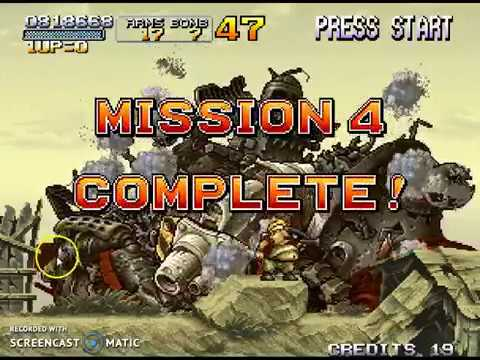